In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

import os, glob, inspect, sys


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

# Import data

In [18]:
data_path = "../../Data/Merged_data"
df = pd.read_csv(os.path.join(data_path, 'ALL_TUBE_PIPE_merge_1.csv'), 
                 index_col=0)


## Calculating new values

In [19]:
calc_df = mc.updated_df(df, mc.measures_list, mc.errors_list)

## Scaling values

In [20]:
scaled_df = mc.scale_general(calc_df, MinMaxScaler())[0]


## Selecting sub samples

In [17]:
tube, pipe, tube_wo_blind, tube_blind = mc.get_subsample_df(calc_df)

In [18]:
tube_scaled, pipe_scaled, tube_wo_blind_scaled, tube_blind_scaled = mc.get_subsample_df(scaled_df)

In [19]:
short_scaled_df = scaled_df.copy().loc[:,mc.without_std_g_list]
tube_scaled_short, pipe_scaled_short, \
tube_wo_blind_scaled_short, tube_blind_scaled_short = mc.get_subsample_df(short_scaled_df)

In [20]:
corr_df = calc_df.copy().loc[:,mc.correlation_list]
tube_corr, pipe_corr, \
tube_wo_blind_corr, tube_blind_corr = mc.get_subsample_df(corr_df)

In [30]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})


In [31]:
def plot_heatmap_rel(df):
    sns.set_theme(style="whitegrid")
    corr_mat = df.corr().stack().reset_index(name="correlation")
    g = sns.relplot(
        data=corr_mat,
        x="level_0", y="level_1", hue="correlation", size="correlation",
        palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
        height=10, sizes=(50, 250), size_norm=(-1, 1)
    )
    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.02)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)
    for artist in g.legend.legendHandles:
        artist.set_edgecolor(".7")


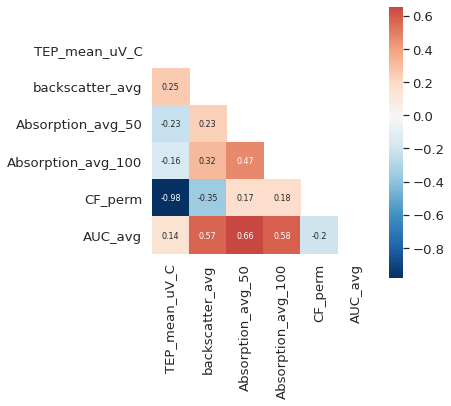

In [32]:
plot_corr(tube_corr, figsize=(5,5))

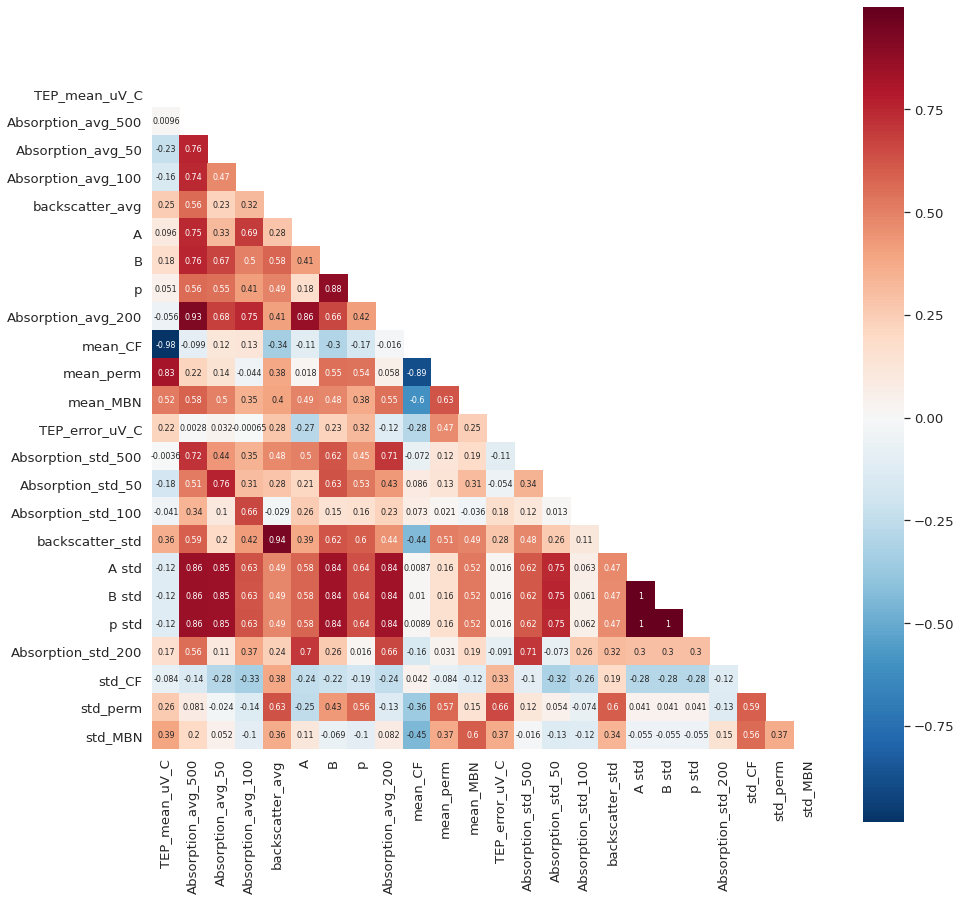

In [33]:
plot_corr(tube_scaled_short)

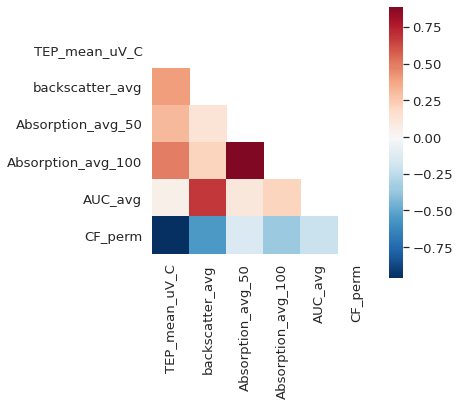

In [69]:
plot_corr(pipe_corr, figsize=(5,5))

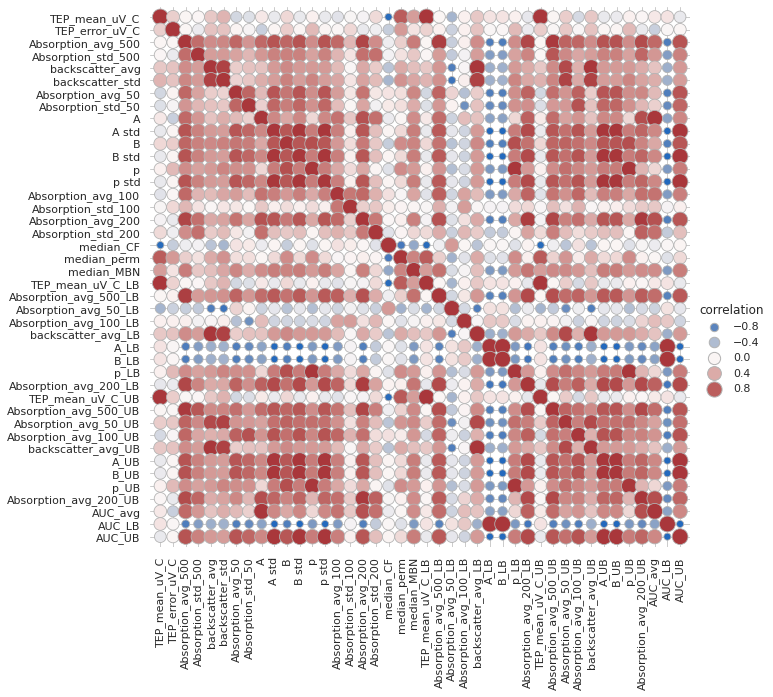

In [24]:
plot_heatmap_rel(tube)

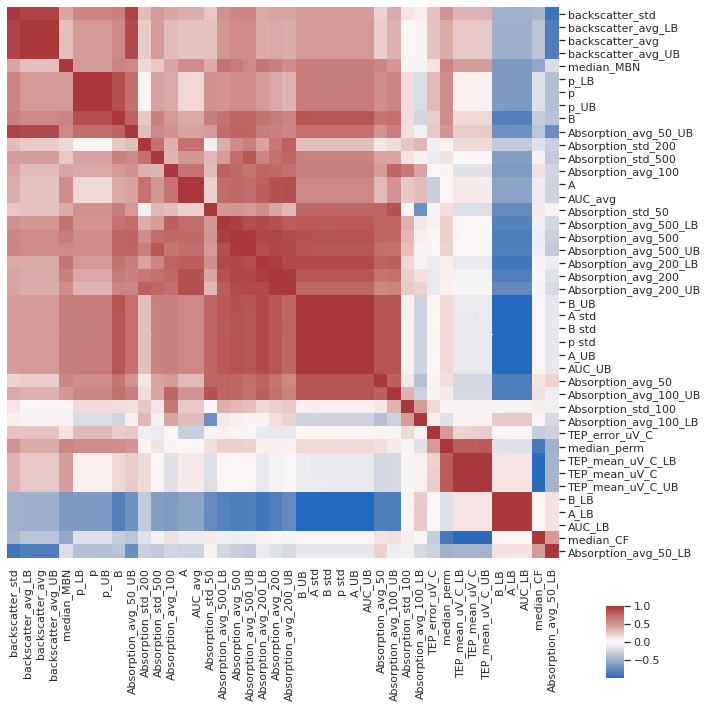

In [25]:
sns.clustermap(tube.corr(), center=0, cmap="vlag", dendrogram_ratio=(0.000001, 0.000001), cbar_pos=(0.85, 0.05, 0.025, 0.1))

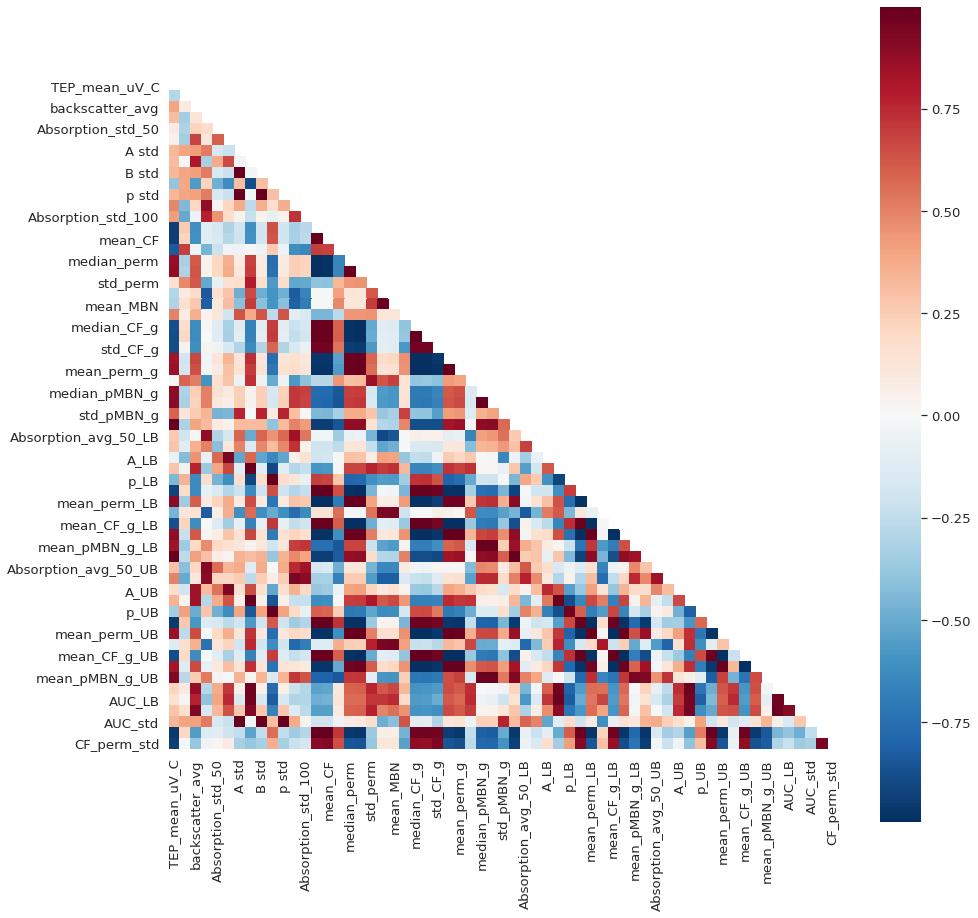

In [11]:
plot_corr(pipe)

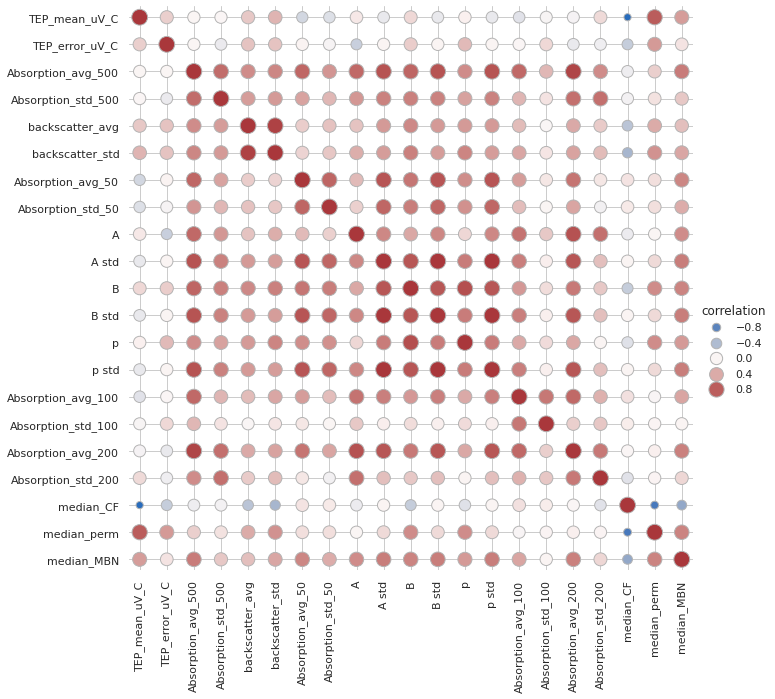

In [322]:
plot_heatmap_rel(tube)

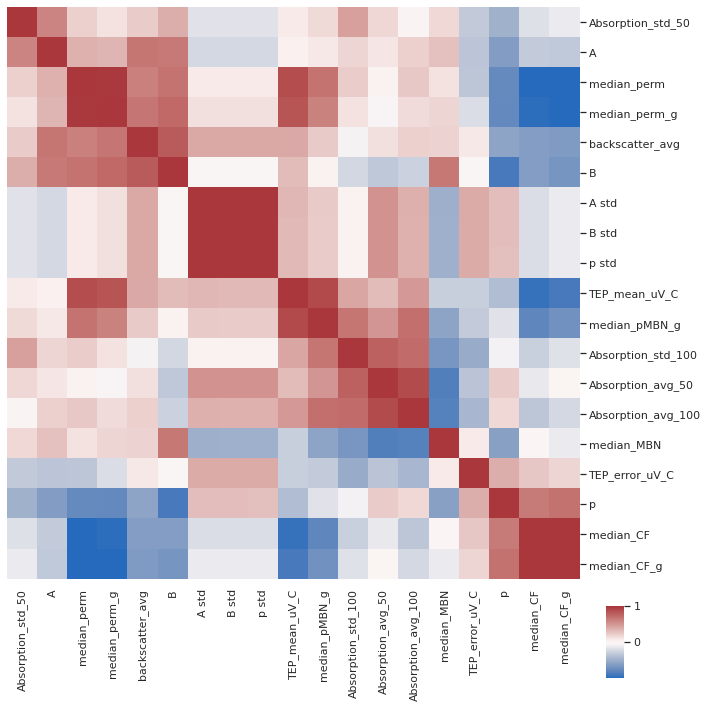

In [324]:
sns.clustermap(pipe.corr(), center=0, cmap="vlag", dendrogram_ratio=(0.000001, 0.000001), cbar_pos=(0.85, 0.05, 0.025, 0.1))

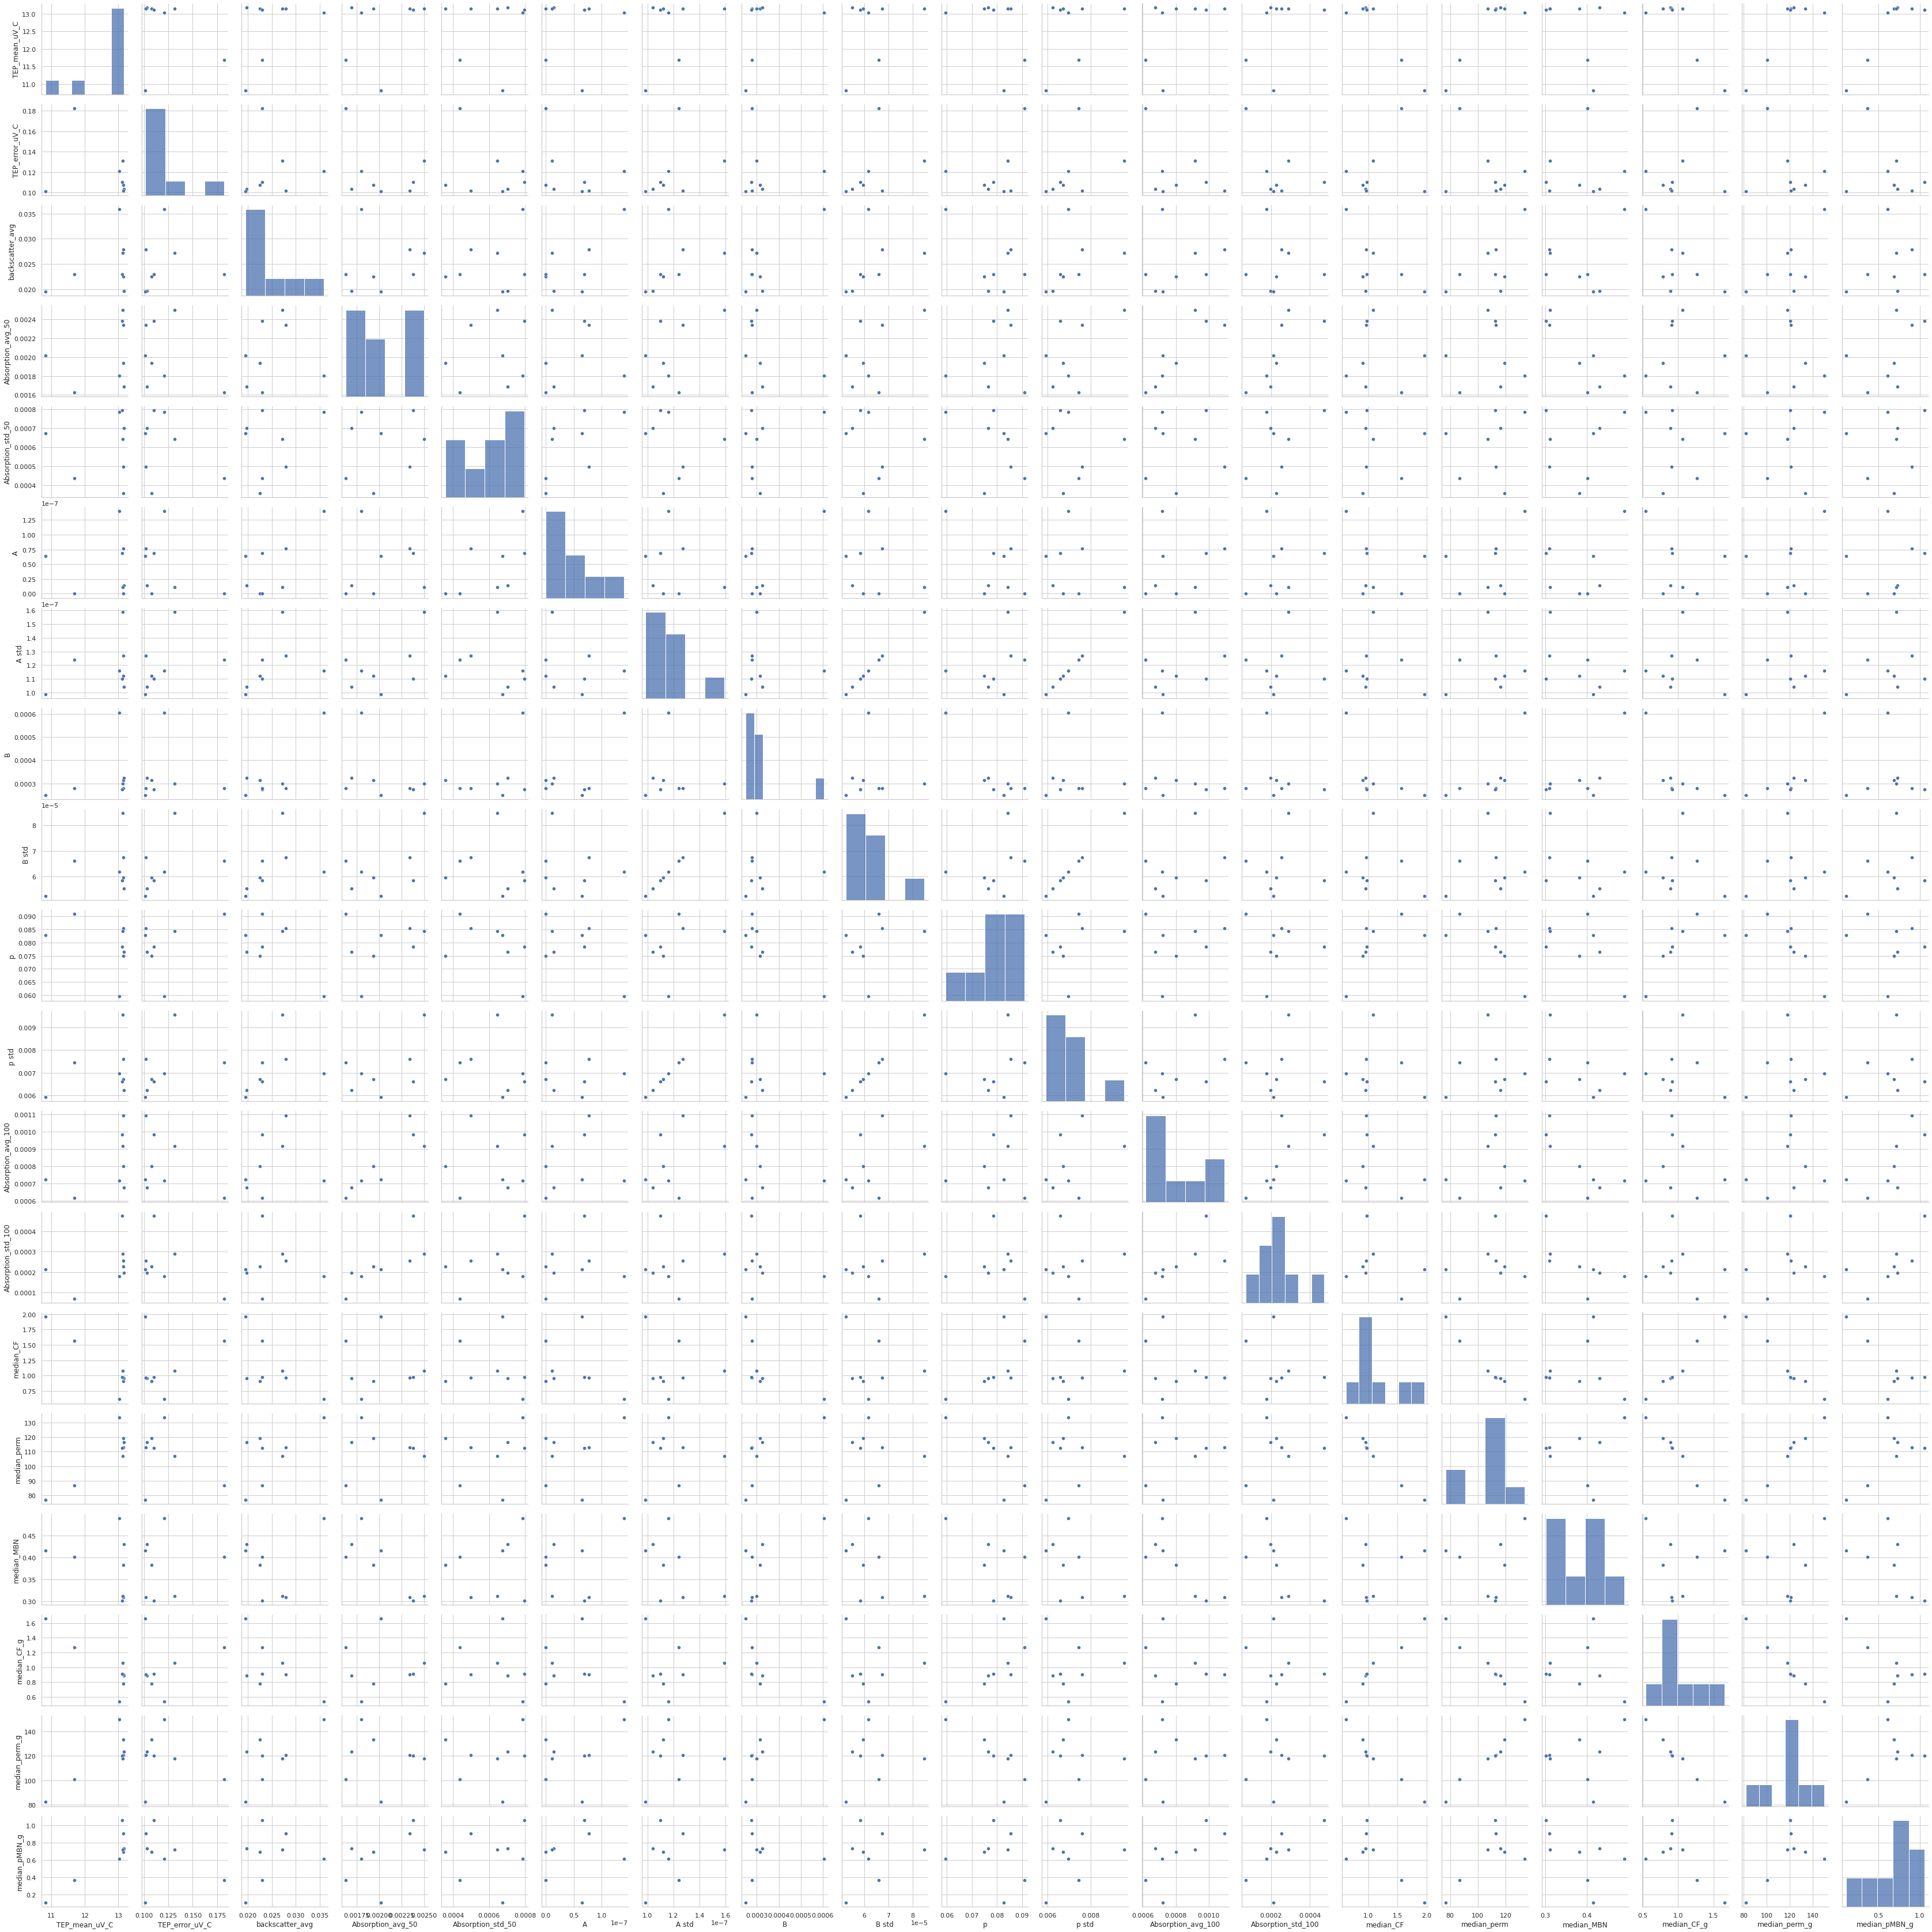

In [323]:
sns.pairplot(pipe)